# Object localization - Bounding Box

---



CV2- Capstone Project

Firstly, let's select TensorFlow version 2.x in colab

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.7.0'

In [4]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

As we are using google colab, we need to mount the google drive to load the data file

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
project_path = "/content/drive/My Drive/Colab Notebooks/Great Learning/Computer Vision/Capstone/"
os.chdir(project_path)


Add path to the folder where your dataset files are

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings

import cv2
warnings.filterwarnings('ignore')
%matplotlib inline


In [5]:
!ls -l 

total 18
-rw------- 1 root root 5799 Nov 27 07:10  Capstone_CV2.ipynb
drwx------ 2 root root 4096 Nov 27 06:24 'Data Set'
drwx------ 2 root root 4096 Nov 27 06:49 'Test Images'
drwx------ 2 root root 4096 Nov 27 06:51 'Train Images'


In [8]:
df = pd.read_csv('Car names and make.csv', header=None,names =['names'])
df['year'] = df['names'].str[-4:]
df['names'] = df['names'].apply(lambda x:x[:-4])
df


,names,year
0,AM General Hummer SUV,2000
1,Acura RL Sedan,2012
2,Acura TL Sedan,2012
3,Acura TL Type-S,2008
4,Acura TSX Sedan,2012
...,...,...
191,Volkswagen Beetle Hatchback,2012
192,Volvo C30 Hatchback,2012
193,Volvo 240 Sedan,1993
194,Volvo XC90 SUV,2007


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   names   196 non-null    object
 1   year    196 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


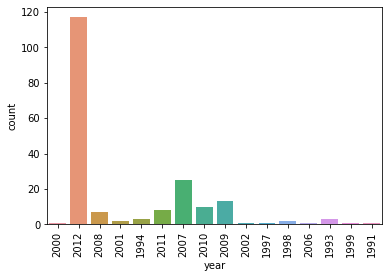

In [10]:
sns.countplot(x='year',data=df)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()


In [12]:
text = " ".join(name for name in df.names)
print ("no of words {} words .".format(len(text)))


no of words 4669 words .


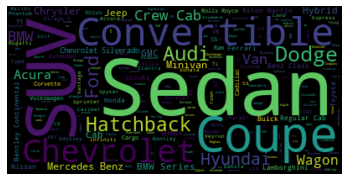

In [13]:

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


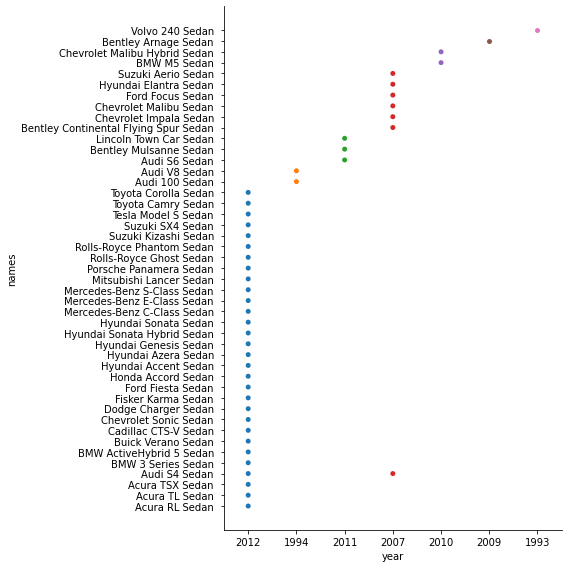

In [14]:
# filtering the rows for Sedan
df1=df[df['names'].str.contains('Sedan')]
sns.catplot(y="names", x="year", data=df1,kind="swarm",height=8, aspect=1)


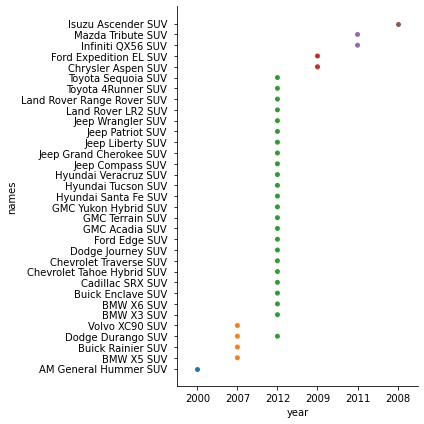

In [15]:
# filtering the rows for Sedan
df2=df[df['names'].str.contains('SUV')]
sns.catplot(y="names", x="year", data=df2,kind="swarm",height=6, aspect=1)



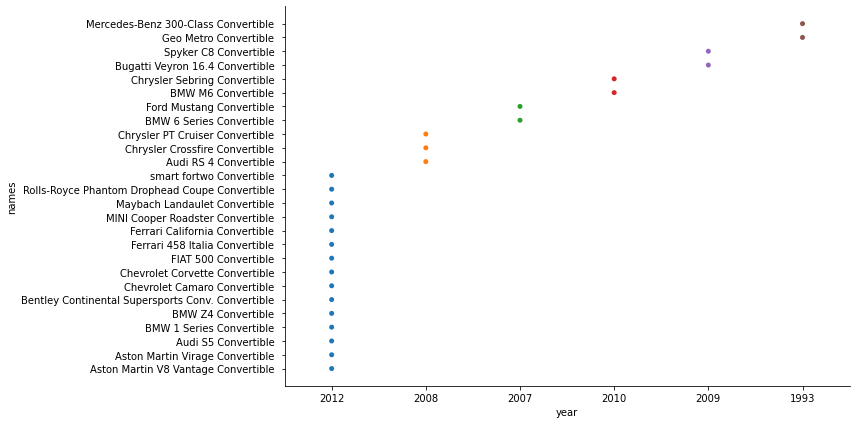

In [16]:
# filtering the rows for Sedan
df3=df[df['names'].str.contains('Convertible')]
sns.catplot(y="names", x="year", data=df3,kind="swarm",height=6, aspect=2)



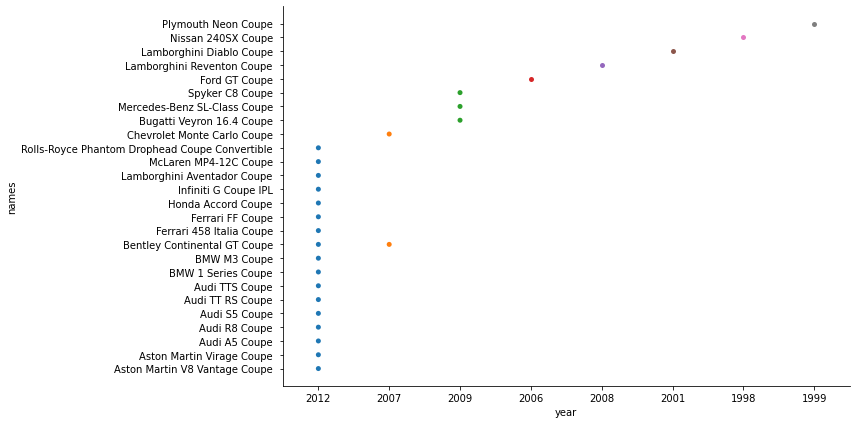

In [17]:
# filtering the rows for Sedan
df4=df[df['names'].str.contains('Coupe')]
sns.catplot(y="names", x="year", data=df4,kind="swarm",height=6, aspect=2)



In [35]:
def get_image_details(path):
    data = pd.DataFrame()
    base_path = os.path.join(project_path,path)

    # list all folders inside train directory
    for dname in os.listdir(base_path):   
      dir_path = os.path.join(base_path, dname)  
      # if it's a directory
      if os.path.isdir(dir_path):
        for fname in os.listdir(dir_path):
          # is it a valid file (ends with .jpg)
            if fname.endswith('.jpg'): 
              fpath = os.path.join(dir_path, fname)
            # read each image inside train directory one by one
              img = cv2.imread(fpath)
              temp_df = pd.DataFrame({'Height': [img.shape[0]],'Width' : [img.shape[1]],'Path' : [fpath],'Name' : [fname],'Label' : [dname] })
              data = data.append(temp_df, ignore_index=True)
    return data


In [36]:
import cv2
test_path = 'Images/Test Images'
test_df = get_image_details(test_path)


In [37]:
train_path = 'Images/Train Images'
train_df = get_image_details(train_path)
